# AUTOENCODER

In [1]:
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn.nn import NeuralNetwork
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Generate an instance of your NeuralNetwork class for the 64x16x64 autoencoder

In [2]:
nn_ar = [{'input_dim': 64, 'output_dim': 16, 'activation' : 'Relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'Relu'}]
lr = .01
seed = 32
batch_size = 100
epochs = 23
loss_function = "mse"

auto_enconder = NeuralNetwork(nn_ar,lr, seed, batch_size,epochs,loss_function)


### Read in toy dataset 'digits' from sklearn using digits = sklearn.datasets.load_digits()

In [3]:
digits = load_digits()

### Split the digits dataset into a train and a validation set

In [4]:
X = digits.data
X_train, X_test, y_train, y_test = train_test_split(X, X, test_size=0.33, random_state=2)

### Train your autoencoder on the train split of your digits dataset

In [5]:
per_epoch_loss_train,per_epoch_loss_val = auto_enconder.fit(X_train,y_train,X_test,y_test)

### Plot your training and validation loss per epoch

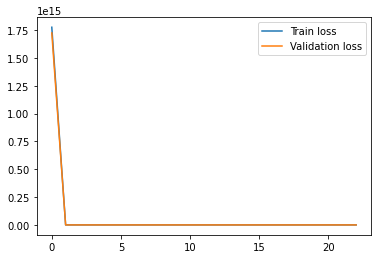

In [6]:
yaxis_t = per_epoch_loss_train
xaxis_t = list(range (len(per_epoch_loss_train)))
yaxis_v = per_epoch_loss_val
xaxis_v = list(range (len(per_epoch_loss_val)))
plt.plot(xaxis_t, yaxis_t, label = "Train loss")
plt.plot(xaxis_v, yaxis_v, label = "Validation loss")
plt.legend()
plt.show()

### Trying different parameters

We are doing grid search for the hyperparameters

In [7]:
# We are using the same architecture, loss function and seed
nn_ar = [{'input_dim': 64, 'output_dim': 16, 'activation' : 'Relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'Relu'}]
seed = 32
loss_function = "mse"

## We are going to change  learning rate, the batch size and the epochs
lr_grid = [.5,.05,.005]
batch_grid = [5,50,500]
epochs = [10, 100, 400]

loss_grid = []
chosen_param = []

for i in lr_grid:
    for b in batch_grid:
        for e in epochs:
            auto_enconder = NeuralNetwork(nn_ar,i, seed, b, e,loss_function)
            _,val_loss = auto_enconder.fit(X_train,y_train,X_test,y_test)
            loss_grid.append(min((val_loss)))
            chosen_param.append([e,b,i])



In [8]:
min_loss = loss_grid.index(min(loss_grid)) ## This is the index of the min loss of all the iterations
chosen_param [min_loss] ## This are the chosen parameters

[400, 50, 0.005]

Based on this small grid search I think this are the appropiate hyperparameters. 

The other parameters like the activation and the loss functions were chosen because they were the ones more fitted for the question. We are doing a continous prediction so mean square error seems like a appropiate choice .

### Quantify your average reconstruction

In [9]:
## We use the best parametes 
auto_enconder = NeuralNetwork(nn_ar,.05, seed, 500,10,loss_function)
train_loss,val_loss = auto_enconder.fit(X_train,y_train,X_test,y_test)

In [10]:
y_pred,cache = auto_enconder.predict(X_test) ## predict 

In [11]:
all_mse = (sum((y_pred-y_test)**2))/len(y_test) ## mse over the whole data set
sum(all_mse)/len(all_mse)

59.83444874803243